<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 03:  Statistics**

## **Outline**

1. [Ejercicio 1.](#eje1)
2. [Ejercicio 2.](#eje2)
2. [Ejercicio 3.](#eje3)
2. [Ejercicio 4.](#eje4)
2. [Ejercicio 5.](#eje5)

In [87]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "H2" #@param {type:"string"}
assignment_id = 'ai1-'+group_id +'.20212.pset-statistics'
code_subject = '1'
student_id = "2182066" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [88]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name', 'course_name', 'student_id'])
config = Config(server_name='https://azuregrader.azurewebsites.net/api', 
                course_name='ai1', student_id='2162107')


def check_solution(assignment_id, student_func_str):

    # Set the endpoint and payload.
    payload = {'func_str': student_func_str, 'assignment_id': assignment_id}
    endpoint_url = config.server_name + '/CheckSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.get(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

---
# **Ejercicio 1**  <a name="eje1"></a>
---

Completa la función `aprob` para que, dada una distribución representada por `D`, un objeto `scipy.stats`, devuelva

$$P(X>a\;\; \&\;\; X<b)$$

para ello usa la función CDF que tiene la distribución sabiendo que:

$$P(X<t) = CDF_X(t)$$

In [89]:
def aprob(D, a, b):
    import scipy.stats as stats
    
    return (D.cdf(b) - D.cdf(a))

In [90]:
#@title **check your answer**
student_func_str = inspect.getsource(aprob)
r = check_solution(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.


In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(aprob)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.


### **Billetes: Falsos o auténticos?**

Los siguientes ejercicios se basan en el siguiente dataset [Enlace fuente](http://archive.ics.uci.edu/ml/datasets/banknote+authentication). En este dataset han caracterizado un conjunto de billetes que son auténticos y verdaderos. Ahora vamos a analizar sus principales características y descrubir si podemos diseñar métodos estadísticos para clasificarlos. 

(1371, 5)


,varianza,asimetria,curtosis,entropia,clase
0,4.5459,8.1674,-2.4586,-1.46210,0
1,3.8660,-2.6383,1.9242,0.10645,0
2,3.4566,9.5228,-4.0112,-3.59440,0


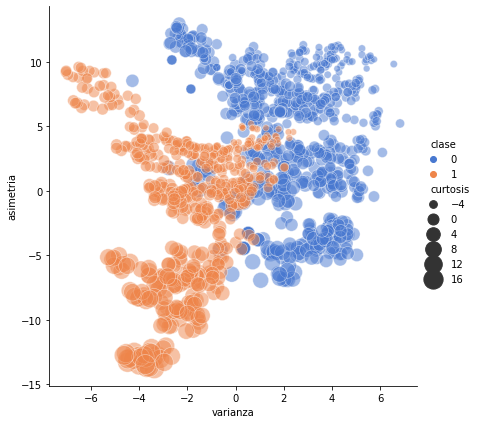

In [91]:
#@title **Billetes: Falsos o auténticos?**
variable_x = "varianza" #@param {type:"string"}
variable_y = "asimetria" #@param {type:"string"}
variable_s = "curtosis" #@param {type:"string"}

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_h = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
print(data_h.shape)
data_h.rename(columns={'3.6216':'varianza','8.6661':'asimetria',
                       '-2.8073':'curtosis', '-0.44699':'entropia', '0': 'clase'},
               inplace=True)

sns.relplot(x=variable_x, y=variable_y, hue="clase", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_h);

data_h.head(3)

---
# **Ejercicio 2**  <a name="eje2"></a>
---

Escriba una función que cargue el dataset de billetes. 
- los billetes falsos son de la clase 1
- devuelva la matrix de correlación. 
- También debe crear dos distribuciones normales con la variable `varianza`, discriminados por la `clase` del billete.
- La función debe devolver también el tercer momento estidisticos de cada distribución. Apoyese de la ayuda de scipy. 

La respuesta debería ser algo como:     

```
(           varianza  asimetria  curtosis  entropia     clase
 varianza   1.000000   0.263333 -0.380358  0.276666 -0.724655
 asimetria  0.263333   1.000000 -0.786729 -0.526896 -0.444281
 curtosis  -0.380358  -0.786729  1.000000  0.319219  0.155346
 entropia   0.276666  -0.526896  0.319219  1.000000 -0.023200
 clase     -0.724655  -0.444281  0.155346 -0.023200  1.000000,
 -26.326761855146177,
 39.586806531071)
```



In [95]:
#@title **code student**
def corr_momentos():
  
    import pandas as pd
    import numpy as np
    import scipy.stats as stats
    data_h = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
    data_h.rename(columns={'3.6216':'varianza','8.6661':'asimetria','-2.8073':'curtosis', '-0.44699':'entropia', '0': 'clase'}, inplace=True)
    
    data_r = data_h['varianza'][data_h.clase == 0]
    data_f = data_h['varianza'][data_h.clase == 1]

    normRDist = stats.norm.moment(3, loc=np.mean(data_r), scale=np.std(data_r))
    normFDist = stats.norm.moment(3, loc=np.mean(data_f), scale=np.std(data_f))


    return data_h.corr(), normFDist, normRDist

corr_momentos()

(           varianza  asimetria  curtosis  entropia     clase
 varianza   1.000000   0.263333 -0.380358  0.276666 -0.724655
 asimetria  0.263333   1.000000 -0.786729 -0.526896 -0.444281
 curtosis  -0.380358  -0.786729  1.000000  0.319219  0.155346
 entropia   0.276666  -0.526896  0.319219  1.000000 -0.023200
 clase     -0.724655  -0.444281  0.155346 -0.023200  1.000000,
 -26.326761855146177,
 39.586806531071)

In [96]:
#@title **check your answer**
student_func_str = inspect.getsource(corr_momentos)
r = check_solution(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.


In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(corr_momentos)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.


---
# **Ejercicio 3**  <a name="eje3"></a>
---

Escriba una función que reciba un conjunto de valores de la variable 'varianza' y devuelva su respectiva clasificación. Para ello, la función debe:    
- Crear distribuciones normales para los billetes falsos y auténticos, respectivamente
- Asignar la clase a cada muestra, según la mayor probabilidad con respecto a las dos distribuciones normales. 

- Debe devolver una lista con cada predicción del conjunto de datos pasado
  
  **  Tenga en cuenta la normalización de las distribuciones. 

  Por ejemplo, para un vector de valores: 


```
[-2.7723e+00 -1.3885e+00  2.8672e+00  8.1583e-01  1.5940e+00 -1.2846e+00
 -2.4037e-01  3.6289e+00 -3.5801e+00 -2.2804e+00  6.4295e-01 -1.3274e+00 ...
```
Se obtienen las siguientes clasificaciones: 



```
[1 1 0 0 0 1 1 0 1 1 0 1 ... 
```




In [ ]:
#@title **code student**
def batch_classification(batch): 
    import pandas as pd
    import numpy as np
    import scipy.stats as stats
    
    data_h = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
    data_h.rename(columns={'3.6216':'varianza','8.6661':'asimetria','-2.8073':'curtosis', '-0.44699':'entropia', '0': 'clase'}, inplace=True)

    real = data_h["varianza"][data_h.clase == 0]
    fake = data_h["varianza"][data_h.clase == 1]

    realDis = stats.norm(loc=np.mean(real), scale=np.std(real))
    r, rN = np.linspace(realDis.ppf(0.01), realDis.ppf(0.99), 100, retstep=True)

    fakeDis = stats.norm(loc=np.mean(fake), scale=np.std(fake))
    f, fN = np.linspace(fakeDis.ppf(0.01), fakeDis.ppf(0.99), 100, retstep=True)

    return list(((rN * realDis.pdf(batch)) < (fN * fakeDis.pdf(batch))).astype(int))

test = [-2.7723e+00, -1.3885e+00,  2.8672e+00,  8.1583e-01,  1.5940e+00, -1.2846e+00, -2.4037e-01,  3.6289e+00, -3.5801e+00, -2.2804e+00,  6.4295e-01, -1.3274e+00]

batch_classification(test)

[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1]

In [ ]:
#@title **check your answer**
student_func_str = inspect.getsource(batch_classification)
r = check_solution(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.


In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(batch_classification)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.


---
# **Ejercicio 4**  <a name="eje4"></a>
---

Realice una función que calcule los intervalos de confianza de las distribuciones correspondientes para billetes auténticos y falsos de la variable `varianza`. 
- Las distribuciones normales deben ser calculadas del la forma computacional LTC. Es decir calculando n medias ( `N_means`), a partir de un conjunto de muestras  `size_sample`, que cambian aleatoriamente para cada media. 

- Construya una función normal para cada distribución (auténticos y falsos), una vez obtenida una lista con las múltiples medias (el tamaño de la lista es `N_means`).

- Retorne los valores de confidencia para la distribución falso y auténtico, respectivamente, según un valor de confianza (`interval_conf`), pasado a la función. 

In [ ]:
def LTC_confidence(N_means, size_sample, interval_conf=0.95): 

    import pandas as pd
    import numpy as np
    import scipy.stats as stats

    data_h = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
    data_h.rename(columns={'3.6216':'varianza','8.6661':'asimetria','-2.8073':'curtosis', '-0.44699':'entropia', '0': 'clase'}, inplace=True)

    real = data_h["varianza"][data_h.clase == 0]
    fake = data_h["varianza"][data_h.clase == 1]

    realDis = stats.norm(loc=np.mean(real), scale=np.std(real))
    fakeDis = stats.norm(loc=np.mean(fake), scale=np.std(fake))

    realSamples = [np.mean(realDis.rvs(size = size_sample)) for _ in range(N_means)]
    fakeSamples = [np.mean(fakeDis.rvs(size = size_sample)) for _ in range(N_means)]

    return stats.norm.interval(alpha = interval_conf, loc = np.mean(fakeSamples), scale = np.std(fakeSamples)), stats.norm.interval(alpha = interval_conf, loc = np.mean(realSamples), scale = np.std(realSamples))

LTC_confidence(5, 3)

((-4.001821073658093, 0.5887498230370567),
 (-1.410675791092551, 5.535369882639753))

In [ ]:
#@title **check your answer**
student_func_str = inspect.getsource(LTC_confidence)
r = check_solution(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.


In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(LTC_confidence)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.


---
# **Ejercicio 5**  <a name="eje5"></a>
---
Realice una función que aproxime una distribución normal de los datos de `varianza` utilizando la formulación analítica del LTC $\mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$. 

- La función debe recibir el parametro `N` y un conjunto de datos  (batch)`'varianza' `para que sean clasificados. 
- la función debe construir las distribuciones para Falsos (1) y Auténticos (0), respectivamente. 
- La función debe retornar las clasificaciones respectivas del 'batch' de datos
- Tenga en cuenta la normalización de las distribuciones

Un ejemplo del resultado, para el subconjunto: 


```
[ 1.2706  -2.8267   0.5706  -2.456    0.6005  -1.8215  -7.0364  -0.89569
 -1.7104  -1.8391   4.0405  -0.53966  4.6361   0.6818   2.4008   5.0297
  3.1541   2.4226  -1.5449  -5.873    1.934   -0.90784  2.5817   1.164
  0.90407 -3.506   -4.0786   3.4805   0.58836 -1.1804   1.4501  -0.45062
  0.11806  3.8481   3.5257  -2.41     3.404   -1.5951   1.7452  -2.9498
 -4.0218   3.1836   2.2034   0.3292  -5.637    3.8846  -3.9594  -3.9297
  3.5499  -4.0214  -0.63298 -0.55355  4.0715  -3.8203   2.5331  -1.8219
  1.8205  -2.1333  -1.2528   4.0552  -0.3481  -0.91318 -0.10234 -0.66008
 -2.6649  -4.8426  -1.1005  -2.6479   2.3925 ]
```


Es la siguiente clasificación:  

```
[0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0
 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0]
```







In [99]:
#@title **code student**
def LTC_clasification(N, batch): 

    import pandas as pd
    import numpy as np
    import scipy.stats as stats
    
    data_h = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
    data_h.rename(columns={'3.6216':'varianza','8.6661':'asimetria','-2.8073':'curtosis', '-0.44699':'entropia', '0': 'clase'}, inplace=True)

    real = data_h["varianza"][data_h.clase == 0]
    fake = data_h["varianza"][data_h.clase == 1]

    realDis = stats.norm(loc=np.mean(real), scale=np.std(real)/np.sqrt(N))
    fakeDis = stats.norm(loc=np.mean(fake), scale=np.std(fake)/np.sqrt(N))


    return list((((realDis.pdf(batch)) < (fakeDis.pdf(batch))).astype(int)))




    

In [100]:
#@title **check your answer**
student_func_str = inspect.getsource(LTC_clasification)
r = check_solution(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.


In [101]:
#@title **send your answer**
student_func_str = inspect.getsource(LTC_clasification)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>